In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # 시각화 지원
import matplotlib
matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus']=False

In [4]:
# 데이터 인덱스 설정, 데이터 타입 변경, 라벨링 작성
sr=pd.Series([10,20,30,40,50],index=['a','b','c','d','e'], name='파이썬 점수')
sr

a    10
b    20
c    30
d    40
e    50
Name: 파이썬 점수, dtype: int64

In [5]:
# 통계 관련

In [7]:
# 최대값
sr.max()

50

In [9]:
# 가장 큰값의 인덱스 출력
sr.idxmax()

'e'

In [10]:
# 최소값
sr.min()

10

In [12]:
# 합
sr.sum()

150

In [14]:
# 평균
sr.mean()

30.0

In [16]:
# 리스트의 중간값, 값의 갯수가 짝수개이면 가운데 값을 더한 후 2로 나눔
sr.median()

30.0

In [20]:
# 데이터를 정렳했을때 ()안 퍼센트에 해당하는 값 출력 
# 0.25와 0.75는 중요 (이상치를 뺀 값이기 때문에)

sr.quantile([0.25,0.5,0.75])

0.25    20.0
0.50    30.0
0.75    40.0
Name: 파이썬 점수, dtype: float64

In [22]:
# 표준편차 (개별 데이터를 평균 값으로 뺀후)
# 적을수록 골고루 분포 되어있다.

sr.std()

15.811388300841896

In [24]:
# 데이터의 갯수
sr.count()

5

In [29]:
sr['c']=50
sr

a    10
b    20
c    50
d    40
e    50
Name: 파이썬 점수, dtype: int64

In [31]:
# 중복 데이터를 제거하고 중복된 데이터 하나만 출력
sr.unique()

array([10, 20, 50, 40], dtype=int64)

In [34]:
# 해당 값의 갯수
sr.value_counts()

50    2
20    1
10    1
40    1
Name: 파이썬 점수, dtype: int64

In [37]:
# 카테고리 
# 값이 속하는 카테고리를 나타내줌
# 0보다 크고 30보다 작거나 같다
# 30보다 크고 50보다 작거나 같다
# 50보다 크고 100보다 작거나 같다

pd.cut(sr,[0,30,50,100] )

a     (0, 30]
b     (0, 30]
c    (30, 50]
d    (30, 50]
e    (30, 50]
Name: 파이썬 점수, dtype: category
Categories (3, interval[int64]): [(0, 30] < (30, 50] < (50, 100]]

In [43]:
# 카테고리 
# 값이 속하는 카테고리를 나타내줌
# 0보다 크고 30보다 작거나 같다
# 30보다 크고 50보다 작거나 같다
# 50보다 크고 100보다 작거나 같다

pd.cut(sr,[0,30,50,100]).value_counts(ascending=True) # 도수 분표

(50, 100]    0
(0, 30]      2
(30, 50]     3
Name: 파이썬 점수, dtype: int64

In [48]:
# 카테고리 
# 값이 속하는 카테고리를 나타내줌
# 0보다 크고 30보다 작거나 같다 = 'C'
# 30보다 크고 50보다 작거나 같다 = 'B'
# 50보다 크고 100보다 작거나 같다 = 'A'

pd.cut(sr,[0,30,50,100],labels=['C','B','A']) # 해당하는 카테고리의 이름을 나타냄

a    C
b    C
c    B
d    B
e    B
Name: 파이썬 점수, dtype: category
Categories (3, object): [C < B < A]

In [52]:
def fn(v):
    print('v=',v)
    return v+1

In [53]:
sr.apply(fn)

v= 10
v= 20
v= 50
v= 40
v= 50


a    11
b    21
c    51
d    41
e    51
Name: 파이썬 점수, dtype: int64

In [59]:
def fb(v):
    #print('v=',v)
    if v<=30:
        return v+2
    else:
        return v+1

In [60]:
sr.apply(fb)

a    12
b    22
c    51
d    41
e    51
Name: 파이썬 점수, dtype: int64

In [63]:
def fc(v):
    return v+3 if v<=30 else v+1

In [65]:
sr.apply(fc)

a    13
b    23
c    51
d    41
e    51
Name: 파이썬 점수, dtype: int64

In [67]:
# lambda
sr.apply(lambda v:v+2 if v<=30 else v+1)

a    12
b    22
c    51
d    41
e    51
Name: 파이썬 점수, dtype: int64

In [70]:
# spark에서는 apply 대신 map 사용
sr.map(lambda v:v+2 if v<=30 else v+1)

a    12
b    22
c    51
d    41
e    51
Name: 파이썬 점수, dtype: int64

In [72]:
# 차트 관련

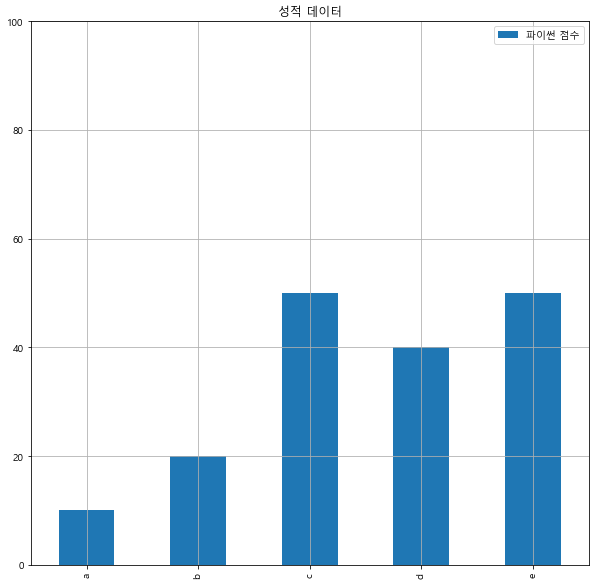

In [86]:
# plot(kind='') 다양한 그래프로 출력가능
#plot(pigsize=(4,4)) 그래프 크기 조절
# grid =True      격자 생성
# title='성적 데이터'   그래프 제목 생성
# legend=True     해당하는 그래프가 무엇을 의미하는지 나타냄
# ylim=(0,100)   y축의 값을 설정
 
sr.plot(kind='bar',figsize=(10,10),title='성적 데이터',grid =True, legend=True, ylim=(0,100)) # 램 메모리에 그림,   
plt.show() # 램 메모리에 그린 그림을 화면 메모리에 출력

In [88]:
# 값만 출력
for n in sr: 
    print(n)

10
20
50
40
50


In [89]:
#.items() 튜플형식으로 키와 값이 출력
for n in sr.items(): 
    print(n)

('a', 10)
('b', 20)
('c', 50)
('d', 40)
('e', 50)
